# Descriptives

In [1]:
from google.cloud import storage
import os
BUCKET_NAME="un_project_lewagon"
path="/Users/teresa/code/renzorico/speeches-at-UN/raw_data/"
client = storage.Client()
blobs = list(client.get_bucket(BUCKET_NAME).list_blobs())
file_name = 'topics.xls'
file_blob = [each for each in blobs if each.name == file_name][0]
latest_model_path_to_save = os.path.join(path, file_blob.name)
file_blob.download_to_filename(latest_model_path_to_save)

This notebook takes as an input the preprocessed data by paragraphs with the topics assigned to it.
It then creates some filters by decade and by group of countries and explores topic frequencies. Also, I try to look into main correlates for some of the topics.

In [63]:
import pandas as pd
path="/Users/teresa/code/renzorico/speeches-at-UN/raw_data/"
topics= pd.read_excel(f'{path}topics.xls')
speeches_df=pd.read_csv(f'{path}prepr_w_topics.csv')

In [2]:
speeches_df = speeches_df.drop(["Unnamed: 0", "Post","country_dup"], axis=1)

In [3]:
speeches_df = speeches_df.dropna(subset=["speeches", "country"], axis=0)

In [4]:
topic=speeches_df['topic']
topic.value_counts()


topic
multilateralism        38750
development            15988
bla_bla                 9966
war                     8570
decolonization          7717
disarmament             7323
economic                6094
humanitarian crises     5804
migration_refugees      4884
terrorism               4409
climate                 2720
human_rights            1810
drugs_crime             1739
pandemic_health          889
gender_issues            840
Name: count, dtype: int64

We should bear in ming that multilateralism is a transversal topic and picks up everything related to UN processes (agreements, resolutions, Security Council issues, General Assembly negotiations...).
There is a lot of potential overlap between the topics and the model doesn't always clearly distinguish them.

## Topics by decades

In [5]:
#decades
def group_decades(year):
    decade = int(year // 10) * 10
    return f"{str(decade)}s"


# Apply the function to create a new 'decade' column
speeches_df['decade'] = speeches_df['year'].apply(group_decades)
speeches_df

Unnamed: 0.1  iso    year  \
0                  0  BEL  1950.0   
1                  1  BEL  1950.0   
2                  2  BEL  1950.0   
3                  3  BEL  1950.0   
4                  4  BEL  1950.0   
...              ...  ...     ...   
117950        117950  HUN  2014.0   
117951        117951  HUN  2014.0   
117952        117952  HUN  2014.0   
117953        117953  HUN  2014.0   
117954        117954  HUN  2014.0   

                                                 speeches  \
0       Never before have men throughout the world mor...   
1       We have used these great, just and noble words...   
2       These are not, of course, the only lessons of ...   
3       From the first day, the general debate in the ...   
4       I had listened attentively to Mr. Vyshinsky’s ...   
...                                                   ...   
117950  Two years ago here in New York, Hurricane Sand...   
117951  Why can we not listen to the wisdom and advice...   
117952  I note, among others, the high incidence of de...   
117953  Only a few days ago, we read that the carbon d...   
117954  The New York example tells us that we are not ...   

       Name of Person Speaking    order  country  speech_length  \
0             Mr. VAN ZEELAND   10375.0  Belgium          18419   
1             Mr. VAN ZEELAND   10375.0  Belgium          18419   
2             Mr. VAN ZEELAND   10375.0  Belgium          18419   
3             Mr. VAN ZEELAND   10375.0  Belgium          18419   
4             Mr. VAN ZEELAND   10375.0  Belgium          18419   
...                        ...      ...      ...            ...   
117950              János Áder   1631.0  Hungary           7812   
117951              János Áder   1631.0  Hungary           7812   
117952              János Áder   1631.0  Hungary           7812   
117953              János Áder   1631.0  Hungary           7812   
117954              János Áder   1631.0  Hungary           7812   

                                         cleaned_speeches  \
0       never before have men throughout the world mor...   
1       we have used these great just and noble words ...   
2       these are not of course the only lessons of th...   
3       from the first day the general debate in the a...   
4       i had listened attentively to mr vyshinsky’s s...   
...                                                   ...   
117950  two years ago here in new york hurricane sandy...   
117951  why can we not listen to the wisdom and advice...   
117952  i note among others the high incidence of derm...   
117953  only a few days ago we read that the carbon di...   
117954  the new york example tells us that we are not ...   

                                      preprocessed_speech  topic_num  \
0       never man throughout world fervently unanimous...          3   
1       use great noble word much become wear eye lose...          3   
2       course lesson korean affair would well weigh s...          3   
3       first day general debate assembly justify high...         14   
4       listen attentively mr vyshinsky ’s speech th m...         14   
...                                                   ...        ...   
117950  two year ago new york hurricane sandy cause da...          1   
117951  listen wisdom advice scientist accept scientif...          1   
117952  note among other high incidence dermatological...          1   
117953  day ago read carbon dioxide concentration neve...          1   
117954  new york example tell we twentyfourth hour twe...          3   

                  topic     score decade  
0                   war  0.627509  1950s  
1                   war  0.412248  1950s  
2                   war  0.583786  1950s  
3       multilateralism  0.781970  1950s  
4       multilateralism  0.678787  1950s  
...                 ...       ...    ...  
117950          climate  0.418813  2010s  
117951          climate  0.422659  2010s  
117952          climate  0.532441  2010s

In [6]:
# year range
speeches_df['year_range'] = ''

# Categorize the years into the desired ranges
speeches_df.loc[speeches_df['year'].between(1946, 1970), 'year_range'] = '1946-1970'
speeches_df.loc[speeches_df['year'].between(1970, 1990), 'year_range'] = '1970-1990'
speeches_df.loc[speeches_df['year'] >= 1990, 'year_range'] = '1990-today'
speeches_df

Unnamed: 0.1  iso    year  \
0                  0  BEL  1950.0   
1                  1  BEL  1950.0   
2                  2  BEL  1950.0   
3                  3  BEL  1950.0   
4                  4  BEL  1950.0   
...              ...  ...     ...   
117950        117950  HUN  2014.0   
117951        117951  HUN  2014.0   
117952        117952  HUN  2014.0   
117953        117953  HUN  2014.0   
117954        117954  HUN  2014.0   

                                                 speeches  \
0       Never before have men throughout the world mor...   
1       We have used these great, just and noble words...   
2       These are not, of course, the only lessons of ...   
3       From the first day, the general debate in the ...   
4       I had listened attentively to Mr. Vyshinsky’s ...   
...                                                   ...   
117950  Two years ago here in New York, Hurricane Sand...   
117951  Why can we not listen to the wisdom and advice...   
117952  I note, among others, the high incidence of de...   
117953  Only a few days ago, we read that the carbon d...   
117954  The New York example tells us that we are not ...   

       Name of Person Speaking    order  country  speech_length  \
0             Mr. VAN ZEELAND   10375.0  Belgium          18419   
1             Mr. VAN ZEELAND   10375.0  Belgium          18419   
2             Mr. VAN ZEELAND   10375.0  Belgium          18419   
3             Mr. VAN ZEELAND   10375.0  Belgium          18419   
4             Mr. VAN ZEELAND   10375.0  Belgium          18419   
...                        ...      ...      ...            ...   
117950              János Áder   1631.0  Hungary           7812   
117951              János Áder   1631.0  Hungary           7812   
117952              János Áder   1631.0  Hungary           7812   
117953              János Áder   1631.0  Hungary           7812   
117954              János Áder   1631.0  Hungary           7812   

                                         cleaned_speeches  \
0       never before have men throughout the world mor...   
1       we have used these great just and noble words ...   
2       these are not of course the only lessons of th...   
3       from the first day the general debate in the a...   
4       i had listened attentively to mr vyshinsky’s s...   
...                                                   ...   
117950  two years ago here in new york hurricane sandy...   
117951  why can we not listen to the wisdom and advice...   
117952  i note among others the high incidence of derm...   
117953  only a few days ago we read that the carbon di...   
117954  the new york example tells us that we are not ...   

                                      preprocessed_speech  topic_num  \
0       never man throughout world fervently unanimous...          3   
1       use great noble word much become wear eye lose...          3   
2       course lesson korean affair would well weigh s...          3   
3       first day general debate assembly justify high...         14   
4       listen attentively mr vyshinsky ’s speech th m...         14   
...                                                   ...        ...   
117950  two year ago new york hurricane sandy cause da...          1   
117951  listen wisdom advice scientist accept scientif...          1   
117952  note among other high incidence dermatological...          1   
117953  day ago read carbon dioxide concentration neve...          1   
117954  new york example tell we twentyfourth hour twe...          3   

                  topic     score decade  year_range  
0                   war  0.627509  1950s   1946-1970  
1                   war  0.412248  1950s   1946-1970  
2                   war  0.583786  1950s   1946-1970  
3       multilateralism  0.781970  1950s   1946-1970  
4       multilateralism  0.678787  1950s   1946-1970  
...                 ...       ...    ...         ...  
117950          climate  0.418813  2010s  

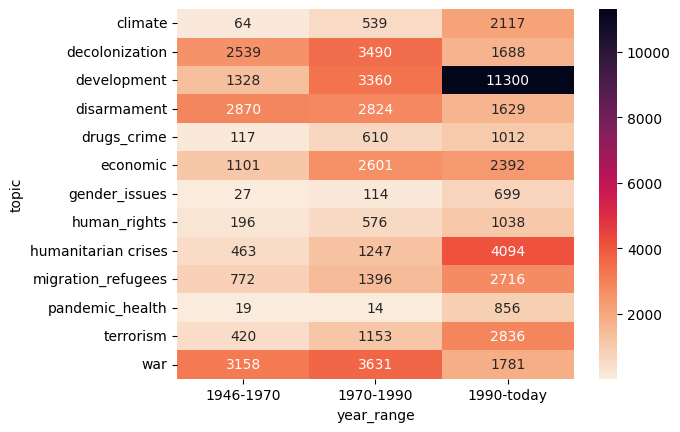

In [7]:
import seaborn as sns
def create_cross_table(speeches_df, feature, to_drop=None):
    cross_table=pd.crosstab(index=speeches_df['topic'], columns=speeches_df[feature])
    cross_table_without = cross_table.drop(['multilateralism', 'bla_bla'], axis=0)
    if to_drop:
        cross_table_without = cross_table_without.drop(columns=[to_drop],axis=1)
    return cross_table_without



sns.heatmap(create_cross_table(speeches_df, "year_range"), cmap='rocket_r', annot=True, fmt='g');


## Topics by country groups

In [8]:
import pycountry
import pycountry_convert as pc

In [9]:
#speeches_df=speeches_df.drop('country_dup', axis=1)
# Function to convert ISO alpha-3 code to country name
def alpha3_to_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except AttributeError:
        return code

# Apply the conversion function to create a new column 'country'
#speeches_df['country_py'] = speeches_df['iso'].apply(alpha3_to_country_name)


In [11]:
# Filter the DataFrame to show rows where the comparison is False
#false_rows = speeches_df[speeches_df['country'] != speeches_df['country_py']]

#print(false_rows['country'].unique())
#print(false_rows['country_py'].unique())

In [10]:
def country_to_continent(country_name):
    custom_mapping = {
        'Yugoslavia': 'Europe',
        'Czechoslovakia' : 'Europe',
        'Union of South Africa' : 'Africa',
        'Democratic Republic of Congo': 'Africa',
        'Congo, the Democratic Republic of the': 'Africa',
        'European Union': 'Europe'
    }
    try:
        if country_name in custom_mapping:
            return custom_mapping[country_name]
        else:
            country_alpha2 = pc.country_name_to_country_alpha2(country_name)
            country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            return country_continent_name
    except KeyError:
        return 'Unknown'



In [11]:
speeches_df['continent'] = speeches_df['country'].apply(country_to_continent)


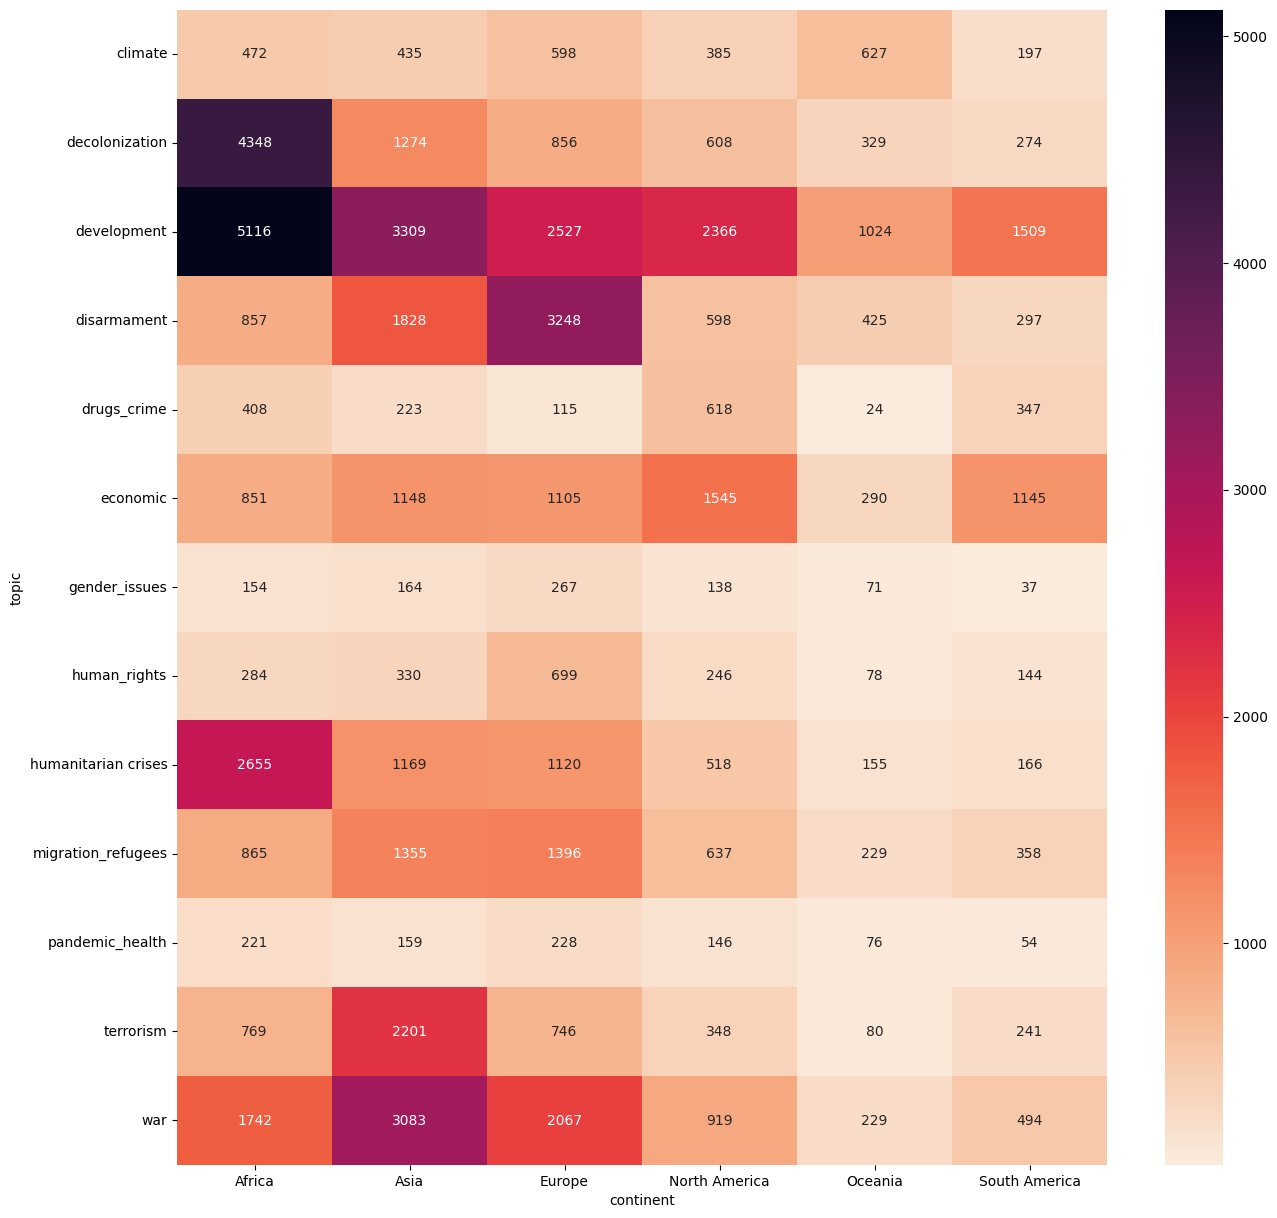

In [12]:
import matplotlib.pyplot as plt
table = create_cross_table(speeches_df, "continent", "Unknown");
fig, axs = plt.subplots(figsize=(15,15))
sns.heatmap(table, cmap='rocket_r', annot=True, fmt='g', ax=axs);


# Frames for each topic

This cell directly below re-imports the preprocescessed text by paragraphs (pre processsed speeches were not saved in the df used above).
- it recalculated the embeddings for the short text in the topics excel file
- it calculates cosine similarity between them and the embeddings matrix calculated on the paragraphs of the speeches
- tags each paragraph with a topic

import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
model = SentenceTransformer('all-mpnet-base-v2')
df = pd.read_csv("/Users/teresa/code/renzorico/speeches-at-UN/raw_data/speeches_with_paragraphs_processed.csv")
embeddings = np.load('/Users/teresa/code/renzorico/speeches-at-UN/raw_data/embeddings.npy')
topics= pd.read_excel("/Users/teresa/code/renzorico/speeches-at-UN/raw_data/topics.xls")  
topics.columns = ['index', 'topic', 'prompt', 'GPT', 'shorter_text']
topic_embeddings = model.encode(topics['shorter_text'], show_progress_bar=True)
similarity_matrix = cosine_similarity(embeddings, topic_embeddings)
topic_index = np.argmax(similarity_matrix, axis=1)
max_similarity_score = np.max(similarity_matrix, axis=1)
df['topic_num'] = topic_index
df['topic'] = speeches_df['topic_num'].apply(lambda x: topics['topic'][x])

In [13]:
speeches_df.to_csv(f'{path}prepr_w_topics.csv')

In [15]:
speeches_df.head(5)

Unnamed: 0.1  iso    year  \
0             0  BEL  1950.0   
1             1  BEL  1950.0   
2             2  BEL  1950.0   
3             3  BEL  1950.0   
4             4  BEL  1950.0   

                                            speeches Name of Person Speaking  \
0  Never before have men throughout the world mor...        Mr. VAN ZEELAND    
1  We have used these great, just and noble words...        Mr. VAN ZEELAND    
2  These are not, of course, the only lessons of ...        Mr. VAN ZEELAND    
3  From the first day, the general debate in the ...        Mr. VAN ZEELAND    
4  I had listened attentively to Mr. Vyshinsky’s ...        Mr. VAN ZEELAND    

     order  country  speech_length  \
0  10375.0  Belgium          18419   
1  10375.0  Belgium          18419   
2  10375.0  Belgium          18419   
3  10375.0  Belgium          18419   
4  10375.0  Belgium          18419   

                                    cleaned_speeches  \
0  never before have men throughout the world mor...   
1  we have used these great just and noble words ...   
2  these are not of course the only lessons of th...   
3  from the first day the general debate in the a...   
4  i had listened attentively to mr vyshinsky’s s...   

                                 preprocessed_speech  topic_num  \
0  never man throughout world fervently unanimous...          3   
1  use great noble word much become wear eye lose...          3   
2  course lesson korean affair would well weigh s...          3   
3  first day general debate assembly justify high...         14   
4  listen attentively mr vyshinsky ’s speech th m...         14   

             topic     score decade year_range continent  
0              war  0.627509  1950s  1946-1970    Europe  
1              war  0.412248  1950s  1946-1970    Europe  
2              war  0.583786  1950s  1946-1970    Europe  
3  multilateralism  0.781970  1950s  1946-1970    Europe  
4  multilateralism  0.678787  1950s  1946-1970    Europe

In [17]:
speeches_df = speeches_df.dropna(subset=["speeches", "country"], axis=0)
speeches_df = speeches_df.drop("Unnamed: 0.1", axis=1)

In [18]:
speeches_df.to_csv(f'{path}prepr_w_topics.csv', index=False)

## Migration

In [20]:
migration_df = speeches_df.loc[speeches_df.topic=="migration_refugees"]
migration_df

iso    year                                           speeches  \
255     ISR  1950.0  Their very evacuation to Israel eliminates sou...   
436     USA  1950.0  As an example of the kind of need to which we ...   
480     JOR  2018.0  Helping the parties to achieve that agreement ...   
481     JOR  2018.0  Collective action is also vital when it comes ...   
489     SWE  2018.0  The gap between current commitments and the re...   
...     ...     ...                                                ...   
117882  TKM  2014.0  In early September, Turkmenistan’s capital hos...   
117883  TKM  2014.0  We   are convinced that it is necessary to con...   
117888  SMR  2014.0  A coalition of States is undertaking a   joint...   
117897  UZB  2014.0  The only reasonable way to tackle the Afghan  ...   
117927  AZE  2014.0  The Trans-Eurasian Information Superhighway   ...   

                Name of Person Speaking    order                   country  \
255                        Mr. SHARETT   10393.0                    Israel   
436                         Mr. ACHESON  10364.0  United States of America   
480     King Abdullah II ibn Al Hussein    861.0                    Jordan   
481     King Abdullah II ibn Al Hussein    861.0                    Jordan   
489                      Mr. Olof Skoog    940.0                    Sweden   
...                                 ...      ...                       ...   
117882                   Rashid Meredov   1726.0              Turkmenistan   
117883                   Rashid Meredov   1726.0              Turkmenistan   
117888               Pasquale Valentini   1711.0                San Marino   
117897                Abdulaziz Kamilov   1738.0                Uzbekistan   
117927  Elmar Maharram oglu Mammadyarov   1567.0                Azerbaijan   

        speech_length                                   cleaned_speeches  \
255             17111  their very evacuation to israel eliminates sou...   
436             30479  as an example of the kind of need to which we ...   
480              7666  helping the parties to achieve that agreement ...   
481              7666  collective action is also vital when it comes ...   
489             12220  the gap between current commitments and the re...   
...               ...                                                ...   
117882          17153  in early september turkmenistan’s capital host...   
117883          17153  we   are convinced that it is necessary to con...   
117888           9276  a coalition of states is undertaking a   joint...   
117897           6678  the only reasonable way to tackle the afghan  ...   
117927           9145  the transeurasian information superhighway   p...   

                                      preprocessed_speech  topic_num  \
255     evacuation eliminate source weakness danger je...          2   
436     example kind need must put effort like speak p...          2   
480     help party achieve agreement work together bui...          2   
481     collective action also vital come resolve conf...          2   
489     gap current commitment require emission reduct...          2   
...                                                   ...        ...   
117882  early september ’s capital host    highlevel i...          2   
117883     convinced necessary consistently combine   ...          2   
117888  coalition state undertake    joint response sa...          2   
117897  reasonable way tackle afghan    problem search...          2   
117927  transeurasian information superhighway    proj...          2   

                     topic     score decade  year_range      continent  
255     migration_refugees  0.589212  1950s   1946-1970           Asia  
436     migration_refugees  0.420521  1950s   1946-1970  North America  
480     migration_refugees  0.554466  2010s  1990-today           Asia  
481     migration_refugees  0.619463  2010s  1990-today           Asia  
489     migration_refugees  0.862035  2

### TFIDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the vectorizer with desired ngram range
vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=1000, stop_words='english')
X = vectorizer.fit_transform(migration_df['preprocessed_speech'])
X_array = X.toarray()

In [23]:
import numpy as np
df_tfidf = pd.DataFrame(X_array, columns =vectorizer.get_feature_names_out() )
word_scores = np.argmax(X_array, axis= 1)
unique, counts = np.unique(word_scores, return_counts=True)
word_count_df = dict(zip(unique, counts))
word_count_df = pd.DataFrame({'word': word_count_df.keys(), 'counts': word_count_df.values()})
features_list = vectorizer.get_feature_names_out()
word_count_df['feature'] = word_count_df['word'].apply(lambda x: features_list[x])
word_count_df = word_count_df.drop('word', axis=1)

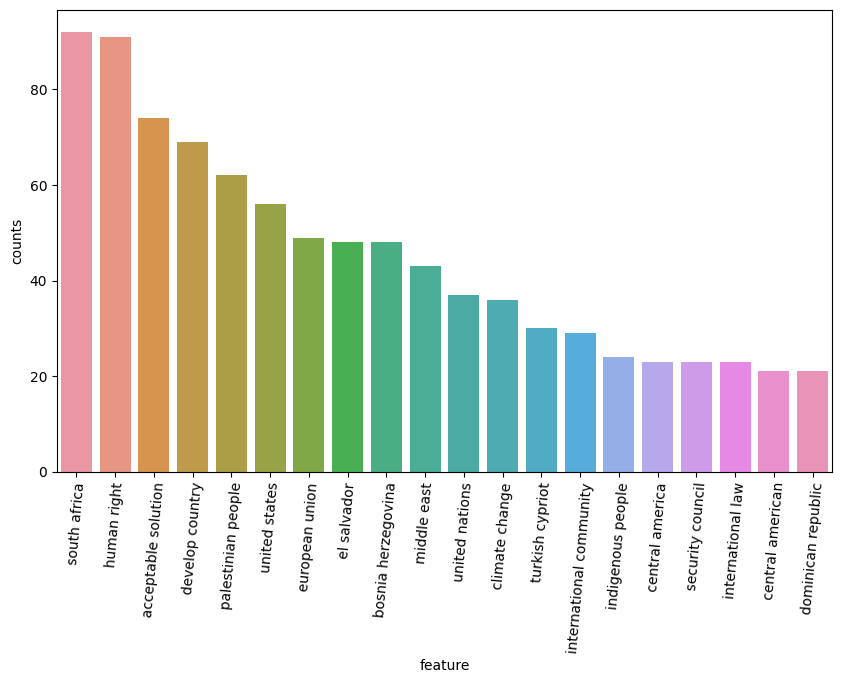

In [24]:
top_20 = word_count_df.sort_values(by='counts', ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20, x='feature', y='counts')
plt.xticks(rotation=85)  # Rotate x-axis labels by 90 degrees
plt.show()

### With BERT

In [25]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/teresa/.pyenv/versions/lewagon/envs/speeches-UN/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/teresa/.pyenv/versions/lewagon/envs/speeches-UN/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/teresa/.pyenv/versions/

In [26]:
def bertopic(texts):
    topic_model = BERTopic()
    #nr topics 
    topic_model.fit(texts)
    #topics, probs = topic_model.fit_transform(texts)

    return topic_model


In [27]:
mig_texts = list(migration_df['preprocessed_speech'].dropna())
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(mig_texts)

In [30]:
topic_model.reduce_topics(mig_texts, nr_topics=10)
topics = topic_model.topics_


In [31]:
migration_bert = topic_model.get_document_info(mig_texts)
migration_bert.head(2)

Document  Topic  \
0  evacuation eliminate source weakness danger je...      0   
1  example kind need must put effort like speak p...      0   

                                   Name  \
0  0_people_international_right_refugee   
1  0_people_international_right_refugee   

                                      Representation  \
0  [people, international, right, refugee, united...   
1  [people, international, right, refugee, united...   

                                 Representative_Docs  \
0  [regard situation middle east nine country con...   
1  [regard situation middle east nine country con...   

                                         Top_n_words  Probability  \
0  people - international - right - refugee - uni...     0.921425   
1  people - international - right - refugee - uni...     0.720111   

   Representative_document  
0                    False  
1                    False

In [32]:
migration_topics=topic_model.get_topics()
migration_topics=pd.DataFrame(migration_topics)
migration_topics

-1  \
0  (international, 0.02428311653459171)   
1         (people, 0.02338482906122235)   
2       (country, 0.022627040532665014)   
3         (world, 0.020822005893347366)   
4         (state, 0.019697138958846606)   
5         (right, 0.019168831591633212)   
6          (human, 0.01640551624258028)   
7      (economic, 0.015788010299368098)   
8     (government, 0.01569766806533597)   
9         (united, 0.01552092959012997)   

                                       0  \
0         (people, 0.024046477664277626)   
1  (international, 0.022467436887411683)   
2          (right, 0.020504682652679556)   
3         (refugee, 0.02028093955630872)   
4          (united, 0.01972842900184169)   
5        (country, 0.018601673887734673)   
6           (state, 0.01784845070895206)   
7           (peace, 0.01714727184378909)   
8        (nations, 0.017033448812239376)   
9        (problem, 0.015581404260917154)   

                                       1  \
0         (central, 0.02781674231947088)   
1     (government, 0.026606510814039662)   
2       (american, 0.023282874329110668)   
3         (people, 0.022302034631777046)   
4       (salvador, 0.022276787613475305)   
5        (america, 0.021884767919821527)   
6        (country, 0.021773425947532503)   
7             (el, 0.021690556360489114)   
8  (international, 0.020671406436559375)   
9          (right, 0.019777649237214933)   

                                       2                                   3  \
0             (sea, 0.03968215058004239)       (berlin, 0.06745072745059068)   
1        (country, 0.034320186217770055)        (german, 0.0661933756429985)   
2       (resource, 0.032108517652022106)       (tyrol, 0.052263027204344135)   
3           (state, 0.03137670060045943)         (west, 0.04247437502055552)   
4       (economic, 0.026991004916517153)       (south, 0.040818971317236274)   
5  (international, 0.025919790751546098)    (austrian, 0.037388204024055446)   
6         (develop, 0.02471278793890627)      (italian, 0.03187366786388431)   
7           (debt, 0.022832905701930528)  (government, 0.031326572989725285)   
8         (fishery, 0.02229876525989813)    (republic, 0.030101129892468704)   
9          (small, 0.022190300133431436)      (federal, 0.02999730675476386)   

                                 4                                      5  \
0    (soviet, 0.09343367514064128)         (moldova, 0.13799251543496094)   
1      (jews, 0.07210609706658198)        (republic, 0.05558851231822315)   
2     (right, 0.04057296800469034)   (transnistrian, 0.04827481865198952)   
3  (russian, 0.037597217295469956)        (moldovan, 0.03717514112493552)   
4     (union, 0.03232344365662556)       (conflict, 0.036080496173071665)   
5   (jewish, 0.029436684645136105)         (european, 0.0317702009229878)   
6    (state, 0.027911302188813474)         (region, 0.027326382263329913)   
7    (human, 0.027575533829940754)      (political, 0.027098549293174266)   
8   (people, 0.021279829021313004)         (reform, 0.024420193858718305)   
9   (latvian, 0.02033506192901083)  (international, 0.024360025154872653)   

                                     6                                      7  \
0    (indigenous, 0.18614570081950574)       (transport, 0.06981108067664678)   
1        (people, 0.07396660226308015)            (asia, 0.05718002179328671)   
2       (fijian, 0.053339202909437194)        (caspian, 0.043855885878224414)   
3         (right, 0.04835234210140451)        (corridor, 0.04324573120273949)   
4     (community, 0.03685090089670444)     (cooperation, 0.04052936102669773)   
5  (constitution, 0.03520990315789611)   (infrastructure, 0.0378049050759327)   
6  (declaration, 0.027544065506201722)  (transportation, 0.03692499365900856)   
7          (new, 0.027170720245112186)          (project, 0.0366039503593121)   
8      (rotumans, 0.02679911023199397)        (economic, 0.03596015294105811)   
9      (culture, 0.025633041759631468)        (central

In [33]:
migration_bert.Topic.value_counts()

Topic
 0    2899
-1    1333
 1     325
 2     150
 3      47
 4      44
 5      35
 6      22
 7      17
 8      12
Name: count, dtype: int64

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
topic_model.visualize_hierarchy()

In [35]:
number=133
print(migration_bert.iloc[number].Document) , print(migration_bert.iloc[number].Top_n_words)

e nga mana nul nga whenua te aotena koutou katoanei ra te reo mihl maioha aotearoatena tatau nga kaupapa koreroka arahina e tataume te ngakau ponome te kotahitanga te tangata opening remark te reo maori language indigenous people aotearoa new zealand tradition acknowledge importance work seem fitting place start leader attend first general assembly strike power potential reside new zealand always acutely aware   remote nation   bottom   south pacific take three hour reach near neighbour plane anywhere take less   hour consider close doubt though geographic isolation contribute value selfdeprecating people
indigenous - people - fijian - right - community - constitution - declaration - new - rotumans - culture


(None, None)

In [36]:
mig_topics_group = migration_bert.groupby(migration_bert['Topic'])
mig_topics_group

In [37]:
def dataframe_to_dictionary(df):
    topics_dictionary = {df['Topic']: df['Name'] for _, df in df.iterrows()}
    return topics_dictionary

In [38]:
topics_dict = dataframe_to_dictionary(migration_bert)
topics=list(topics_dict.values())
topics_df = pd.DataFrame([each.split('_') for each in topics])

topics_df_no_index = topics_df.iloc[:,1:]
topics_df_no_index['sentence'] = topics_df_no_index[1] + ' ' + topics_df_no_index[2] + ' ' + topics_df_no_index[3] + ' ' + topics_df_no_index[4]

topics_df_no_index

from sentence_transformers import SentenceTransformer
# Calculate similarities between sentences
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-mpnet-base-v2')

In [39]:
# Split text into sentences
# Embed sentences
embeddings = model.encode(topics_df_no_index['sentence'])
embedding_df = pd.DataFrame(embeddings)


In [42]:
# sklearn.decomposition import PCA
#pca = PCA(n_components=3)
#pca_df = pca.fit_transform(embedding_df)

from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5)
kmean.fit(embedding_df)

inertias = []
for each in range(1,10):
    
    kmean = KMeans(n_clusters=each)
    kmean.fit(embedding_df)
    inertias.append(kmean.inertia_)
    

In [46]:
#sns.lineplot(x=range(1,10), y=inertias)

In [47]:
embedding_df['label'] = kmean.labels_
topics_df['label'] = kmean.labels_
topics_df.loc[topics_df.label == 0]


0        1         2              3         4  label
3  5  moldova  republic  transnistrian  moldovan      0
6  4   soviet      jews          right   russian      0
8  3   berlin    german          tyrol      west      0

## War

In [50]:
war_df = speeches_df.loc[speeches_df.topic=="war"]
war_df

iso    year                                           speeches  \
0       BEL  1950.0  Never before have men throughout the world mor...   
1       BEL  1950.0  We have used these great, just and noble words...   
2       BEL  1950.0  These are not, of course, the only lessons of ...   
11      BEL  1950.0  But why, after all, should we fear these words...   
14      BLR  1950.0  It is sufficient to note that at a moment when...   
...     ...     ...                                                ...   
117878  TKM  2014.0  In speaking of this, I wish to underline that ...   
117929  AZE  2014.0  Combating impunity is important in order   to ...   
117940  ISL  2014.0  This summer, a pointless war between Israel an...   
117947  HUN  2014.0  “If you seek peace, prepare for war.” Those ar...   
117954  HUN  2014.0  The New York example tells us that we are not ...   

                Name of Person Speaking    order       country  speech_length  \
0                      Mr. VAN ZEELAND   10375.0       Belgium          18419   
1                      Mr. VAN ZEELAND   10375.0       Belgium          18419   
2                      Mr. VAN ZEELAND   10375.0       Belgium          18419   
11                     Mr. VAN ZEELAND   10375.0       Belgium          18419   
14                          Mr. KISELEV  10397.0       Belarus          21303   
...                                 ...      ...           ...            ...   
117878                   Rashid Meredov   1726.0  Turkmenistan          17153   
117929  Elmar Maharram oglu Mammadyarov   1567.0    Azerbaijan           9145   
117940           Gunnar Bragi Sveinsson   1637.0       Iceland          11696   
117947                       János Áder   1631.0       Hungary           7812   
117954                       János Áder   1631.0       Hungary           7812   

                                         cleaned_speeches  \
0       never before have men throughout the world mor...   
1       we have used these great just and noble words ...   
2       these are not of course the only lessons of th...   
11      but why after all should we fear these words s...   
14      it is sufficient to note that at a moment when...   
...                                                   ...   
117878  in speaking of this i wish to underline that t...   
117929  combating impunity is important in order   to ...   
117940  this summer a pointless war between israel and...   
117947  “if you seek peace prepare for war” those are ...   
117954  the new york example tells us that we are not ...   

                                      preprocessed_speech  topic_num topic  \
0       never man throughout world fervently unanimous...          3   war   
1       use great noble word much become wear eye lose...          3   war   
2       course lesson korean affair would well weigh s...          3   war   
11      fear word since sincere we give true meaning s...          3   war   
14      sufficient note moment capitalist country invo...          3   war   
...                                                   ...        ...   ...   
117878  speak wish underline    settlement situation k...          3   war   
117929  combat impunity important order    ensure sust...          3   war   
117940  summer pointless war    gaza cause unacceptabl...          3   war   
117947  " seek peace prepare war " word publius flaviu...          3   war   
117954  new york example tell we twentyfourth hour twe...          3   war   

           score decade  year_range continent  
0       0.627509  1950s   1946-1970    Europe  
1       0.412248  1950s   1946-1970    Europe  
2       0.583786  1950s   1946-1970    Europe  
11      0.334039  1950s   1946-1970    Europe  
14      0.598558  1950s   1946-1970    Europe  
...          ...    ...         ...       ...  
117878  0.469584  2010s  1990-today      Asia  
117929  0.572891  2010s  1990-today      Asia  
117940  0.488569  2010s  1990-today    Europ

In [51]:
#import pandas as pd
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to extract country names from text using spaCy NER
def extract_country_names(text, country):
    doc = nlp(text)
    countries = [ent.text for ent in doc.ents if ent.label_ == "GPE" if ent.text !=country]
    
    return countries



In [52]:
# Apply the extract_country_names function to the preprocessed_speech column
war_df['country_mentions'] = war_df.apply(lambda x: extract_country_names(x['speeches'], x["country"]), axis=1)



In [62]:
war_df.to_csv(f'{path}war.csv', index=False)

In [65]:
war_df

iso    year                                           speeches  \
0       BEL  1950.0  Never before have men throughout the world mor...   
1       BEL  1950.0  We have used these great, just and noble words...   
2       BEL  1950.0  These are not, of course, the only lessons of ...   
11      BEL  1950.0  But why, after all, should we fear these words...   
14      BLR  1950.0  It is sufficient to note that at a moment when...   
...     ...     ...                                                ...   
117878  TKM  2014.0  In speaking of this, I wish to underline that ...   
117929  AZE  2014.0  Combating impunity is important in order   to ...   
117940  ISL  2014.0  This summer, a pointless war between Israel an...   
117947  HUN  2014.0  “If you seek peace, prepare for war.” Those ar...   
117954  HUN  2014.0  The New York example tells us that we are not ...   

                Name of Person Speaking    order       country  speech_length  \
0                      Mr. VAN ZEELAND   10375.0       Belgium          18419   
1                      Mr. VAN ZEELAND   10375.0       Belgium          18419   
2                      Mr. VAN ZEELAND   10375.0       Belgium          18419   
11                     Mr. VAN ZEELAND   10375.0       Belgium          18419   
14                          Mr. KISELEV  10397.0       Belarus          21303   
...                                 ...      ...           ...            ...   
117878                   Rashid Meredov   1726.0  Turkmenistan          17153   
117929  Elmar Maharram oglu Mammadyarov   1567.0    Azerbaijan           9145   
117940           Gunnar Bragi Sveinsson   1637.0       Iceland          11696   
117947                       János Áder   1631.0       Hungary           7812   
117954                       János Áder   1631.0       Hungary           7812   

                                         cleaned_speeches  \
0       never before have men throughout the world mor...   
1       we have used these great just and noble words ...   
2       these are not of course the only lessons of th...   
11      but why after all should we fear these words s...   
14      it is sufficient to note that at a moment when...   
...                                                   ...   
117878  in speaking of this i wish to underline that t...   
117929  combating impunity is important in order   to ...   
117940  this summer a pointless war between israel and...   
117947  “if you seek peace prepare for war” those are ...   
117954  the new york example tells us that we are not ...   

                                      preprocessed_speech  topic_num topic  \
0       never man throughout world fervently unanimous...          3   war   
1       use great noble word much become wear eye lose...          3   war   
2       course lesson korean affair would well weigh s...          3   war   
11      fear word since sincere we give true meaning s...          3   war   
14      sufficient note moment capitalist country invo...          3   war   
...                                                   ...        ...   ...   
117878  speak wish underline    settlement situation k...          3   war   
117929  combat impunity important order    ensure sust...          3   war   
117940  summer pointless war    gaza cause unacceptabl...          3   war   
117947  " seek peace prepare war " word publius flaviu...          3   war   
117954  new york example tell we twentyfourth hour twe...          3   war   

           score decade  year_range continent  \
0       0.627509  1950s   1946-1970    Europe   
1       0.412248  1950s   1946-1970    Europe   
2       0.583786  1950s   1946-1970    Europe   
11      0.334039  1950s   1946-1970    Europe   
14      0.598558  1950s   1946-1970    Europe   
...          ...    ...         ...       ...   
117878  0.469584  2010s  1990-today      Asia   
117929  0.572891  2010s  1990-today      Asia   
117940  0.488569  2010s  1990-today

In [66]:

# Flatten the list of country mentions
country_mentions_flat = [country for countries in war_df['country_mentions'] for country in countries]

# Calculate the frequency of country mentions
country_mentions_freq = pd.Series(country_mentions_flat).value_counts()

# Print the frequencies
country_mentions_flat

['Korea',
 'New York',
 'Korea',
 'the Soviet Government',
 'Kuibishev',
 'Soviet Union',
 'Hitlerite',
 'Soviet Union',
 'Soviet Union',
 'Korea',
 'Korea',
 'States',
 'States',
 'States',
 'States',
 'France',
 'Vienna',
 'States',
 'Germany',
 'Germany',
 'Japan',
 'Korea',
 'Formosa',
 'the democratic',
 'Republic of Korea',
 'The Dominican Republic',
 'Korea',
 'States',
 'Korea',
 'Korea',
 'North Korea',
 'Korea',
 'Korea',
 'Hungary',
 'Romania',
 'Bulgaria',
 'Romania',
 'Hungary',
 'Romania',
 'Bulgaria',
 'Albania',
 'Soviet Union',
 'Soviet Union',
 'United States',
 'Korea',
 'Korea',
 'Athens',
 'States',
 'States',
 'San Francisco',
 'United States',
 'States',
 'Taiwan',
 'United States',
 'Germany',
 'Austria',
 'Japan',
 'United States',
 'Soviet Union',
 'United States',
 'States',
 'London',
 'New York',
 'United States',
 'France',
 'Italy',
 'Belgium',
 'Germany',
 'Yalta',
 'Potsdam',
 'Germany',
 'United States',
 'United Statesn Zone',
 'Germany',
 'Germany',


In [70]:
#pd.set_option("display.max_rows", None)

country_mentions_list=country_mentions_freq[country_mentions_freq >150]
country_mentions_list

United States     4019
Israel            3305
Vietnam           2720
States            2454
Palestine         1287
Lebanon           1215
Soviet Union      1077
Germany            997
Korea              883
China              855
Iraq               841
Afghanistan        829
Iran               740
France             547
South Africa       541
Laos               521
Cambodia           502
Egypt              421
Syria              397
Cyprus             367
United Kingdom     342
Namibia            329
Jerusalem          326
India              234
Angola             234
Cuba               228
Russia             224
Bosnia             201
Arab States        200
Turkey             185
Jordan             182
Kuwait             179
Pakistan           171
Nicaragua          170
Greece             162
Congo              161
Algeria            156
Yugoslavia         151
Name: count, dtype: int64

def clean_countries(mentions):
    country_mentions_list = [mention.replace('the United States of America', 'United States')
                         .replace('United States', 'United States')
                         .replace('the United States', 'United States')
                         .replace('the Soviet Union', 'Soviet Union')
                         .replace('The Soviet Union', 'Soviet Union')

                         .replace('USSR', 'Soviet Union')    
                         .replace('the Federal Republic of Germany', 'Germany')    
                         .replace('West Bank', 'Palestine')    
                         .replace('South Korea', 'Korea')    
                         .replace('Hanoi', 'Vietnam')    
                         .replace('Washington', 'United States')    
                         .replace('Paris', 'France')    
                         .replace('Viet-Nam', 'Vietnam')
                         .replace('Viet Nam', 'Vietnam')
                         .replace('South Viet-Nam', 'Vietnam')
                         .replace('North Viet-Nam', 'Vietnam')
                         
                         .replace('South Viet Nam', 'Vietnam')
                         .replace('the Vietnam', 'Vietnam')
                         .replace('the United Kingdom', 'United Kingdom') 
                         .replace('The United States', 'United States')
                         .replace('America', 'United States')
                         .replace('Berlin', 'Germany')
                         .replace('the Palestine', 'Palestine')
                         .replace('Peking', 'China')
                         .replace('Bosnia and Herzegovina', 'Bosnia')
                         .replace('the German Democratic Republic', 'Germany')
                         .replace('Moscow', 'Rusia')
                         .replace('Gaza', 'Palestine')
                         .replace('West Germany', 'Germany')
                         .replace('Saigon', 'Vietnam')
                         .replace('the Islamic Republic of Iran', 'Iran')
                         .replace('Phnom Penh', 'Cambodia')
                         .replace('the Socialist Republic of Vietnam', 'Vietnam')
                         .replace('the Republic of Viet-Nam', 'Vietnam')
                         .replace('the People\'s Republic of China', 'China')
                         .replace('the Republic of Korea', 'Korea')
                         .replace('the Democratic Republic of Vietnam', 'Vietnam')
                         .replace('South Vietnam', 'Vietnam')
                         .replace('the Republic of Vietnam', 'Vietnam')
                         .replace('Rusia' ,'Russia')
                         .replace('the Palestine Strip' ,'Palestine')
                         .replace('the Republic of Cyprus' ,'Cyprus')
                         .replace('Tel Aviv' ,'Israel')
                         .replace('Koreas' ,'Korea')
                         .replace('Cairo' ,'Egypt')
                         .replace('Western Germany' ,'Germany')
                         .replace('the People’s Republic of China' ,'China')
                         .replace('Beirut' ,'Lebanon')
                         .replace('VietNam' ,'Vietnam')
                         .replace('Pretoria' ,'South Africa')
                         .replace('North Vietnam' ,'Vietnam')
                         .replace('the Arab States' ,'Arab States')

                         .replace('the Democratic Republic of Afghanistan', 'Afghanistan')
                         # Add more recoding patterns as needed
                         for mention in mentions]
    return country_mentions_list
war_df['country_mentions'] = war_df.apply(lambda x: clean_countries(x['country_mentions']), axis=1)



In [71]:
country_mentions_list = [mention.replace('the United States of America', 'United States')
                         .replace('United States', 'United States')
                         .replace('the United States', 'United States')
                         .replace('the Soviet Union', 'Soviet Union')
                         .replace('The Soviet Union', 'Soviet Union')

                         .replace('USSR', 'Soviet Union')    
                         .replace('the Federal Republic of Germany', 'Germany')    
                         .replace('West Bank', 'Palestine')    
                         .replace('South Korea', 'Korea')    
                         .replace('Hanoi', 'Vietnam')    
                         .replace('Washington', 'United States')    
                         .replace('Paris', 'France')    
                         .replace('Viet-Nam', 'Vietnam')
                         .replace('Viet Nam', 'Vietnam')
                         .replace('South Viet-Nam', 'Vietnam')
                         .replace('North Viet-Nam', 'Vietnam')
                         
                         .replace('South Viet Nam', 'Vietnam')
                         .replace('the Vietnam', 'Vietnam')
                         .replace('the United Kingdom', 'United Kingdom') 
                         .replace('The United States', 'United States')
                         .replace('America', 'United States')
                         .replace('Berlin', 'Germany')
                         .replace('the Palestine', 'Palestine')
                         .replace('Peking', 'China')
                         .replace('Bosnia and Herzegovina', 'Bosnia')
                         .replace('the German Democratic Republic', 'Germany')
                         .replace('Moscow', 'Rusia')
                         .replace('Gaza', 'Palestine')
                         .replace('West Germany', 'Germany')
                         .replace('Saigon', 'Vietnam')
                         .replace('the Islamic Republic of Iran', 'Iran')
                         .replace('Phnom Penh', 'Cambodia')
                         .replace('the Socialist Republic of Vietnam', 'Vietnam')
                         .replace('the Republic of Viet-Nam', 'Vietnam')
                         .replace('the People\'s Republic of China', 'China')
                         .replace('the Republic of Korea', 'Korea')
                         .replace('the Democratic Republic of Vietnam', 'Vietnam')
                         .replace('South Vietnam', 'Vietnam')
                         .replace('the Republic of Vietnam', 'Vietnam')
                         .replace('Rusia' ,'Russia')
                         .replace('the Palestine Strip' ,'Palestine')
                         .replace('the Republic of Cyprus' ,'Cyprus')
                         .replace('Tel Aviv' ,'Israel')
                         .replace('Koreas' ,'Korea')
                         .replace('Cairo' ,'Egypt')
                         .replace('Western Germany' ,'Germany')
                         .replace('the People’s Republic of China' ,'China')
                         .replace('Beirut' ,'Lebanon')
                         .replace('VietNam' ,'Vietnam')
                         .replace('Pretoria' ,'South Africa')
                         .replace('North Vietnam' ,'Vietnam')
                         .replace('the Arab States' ,'Arab States')

                         .replace('the Democratic Republic of Afghanistan', 'Afghanistan')
                         # Add more recoding patterns as needed
                         for mention in country_mentions_list]

# Convert the recoded country mentions list back to a Series
country_mentions_recode = pd.Series(country_mentions_list)

# Calculate the frequency of the recoded country mentions
country_mentions_recoded.value_counts()



AttributeError: 'int' object has no attribute 'replace'

In [161]:
country_mentions_recoded = country_mentions_recoded[country_mentions_recoded != 'States']


In [175]:


# Calculate the value counts of the filtered country mentions
country_mentions_filtered_counts = country_mentions_filtered.value_counts()

# Get the list of filtered country mentions with frequencies
country_list = country_mentions_filtered_counts.reset_index().values

country_list

array([['United States', 4019],
       ['Israel', 3305],
       ['Vietnam', 2707],
       ['Palestine', 1287],
       ['Lebanon', 1215],
       ['Soviet Union', 1077],
       ['Germany', 997],
       ['Korea', 883],
       ['China', 855],
       ['Iraq', 841],
       ['Afghanistan', 829],
       ['Iran', 740],
       ['France', 547],
       ['South Africa', 541],
       ['Laos', 521],
       ['Cambodia', 502],
       ['Egypt', 421],
       ['Syria', 397],
       ['Cyprus', 367],
       ['United Kingdom', 342],
       ['Namibia', 329],
       ['Jerusalem', 326],
       ['India', 234],
       ['Angola', 234],
       ['Cuba', 228],
       ['Russia', 224],
       ['Bosnia', 201]], dtype=object)

array([['United States', 4019],
       ['Israel', 3305],
       ['Vietnam', 2707],
       ['Palestine', 1287],
       ['Lebanon', 1215],
       ['Soviet Union', 1077],
       ['Germany', 997],
       ['Korea', 883],
       ['China', 855],
       ['Iraq', 841],
       ['Afghanistan', 829],
       ['Iran', 740],
       ['France', 547],
       ['South Africa', 541],
       ['Laos', 521],
       ['Cambodia', 502],
       ['Egypt', 421],
       ['Syria', 397],
       ['Cyprus', 367],
       ['United Kingdom', 342],
       ['Namibia', 329],
       ['Jerusalem', 326],
       ['India', 234],
       ['Angola', 234],
       ['Cuba', 228],
       ['Russia', 224],
       ['Bosnia', 201]], dtype=object)

In [179]:
top_countries =[each[0] for each in country_list]

['United States',
 'Israel',
 'Vietnam',
 'Palestine',
 'Lebanon',
 'Soviet Union',
 'Germany',
 'Korea',
 'China',
 'Iraq',
 'Afghanistan',
 'Iran',
 'France',
 'South Africa',
 'Laos',
 'Cambodia',
 'Egypt',
 'Syria',
 'Cyprus',
 'United Kingdom',
 'Namibia',
 'Jerusalem',
 'India',
 'Angola',
 'Cuba',
 'Russia',
 'Bosnia']

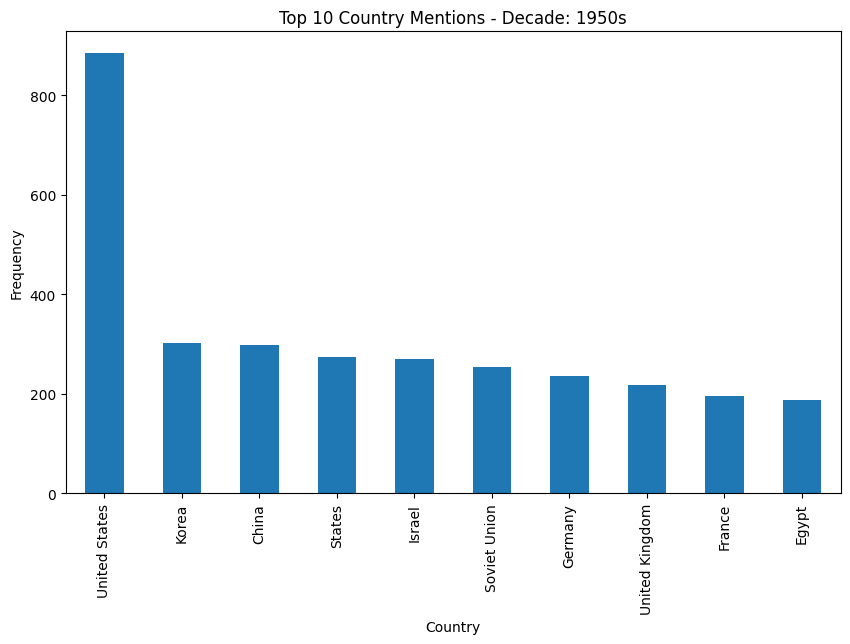

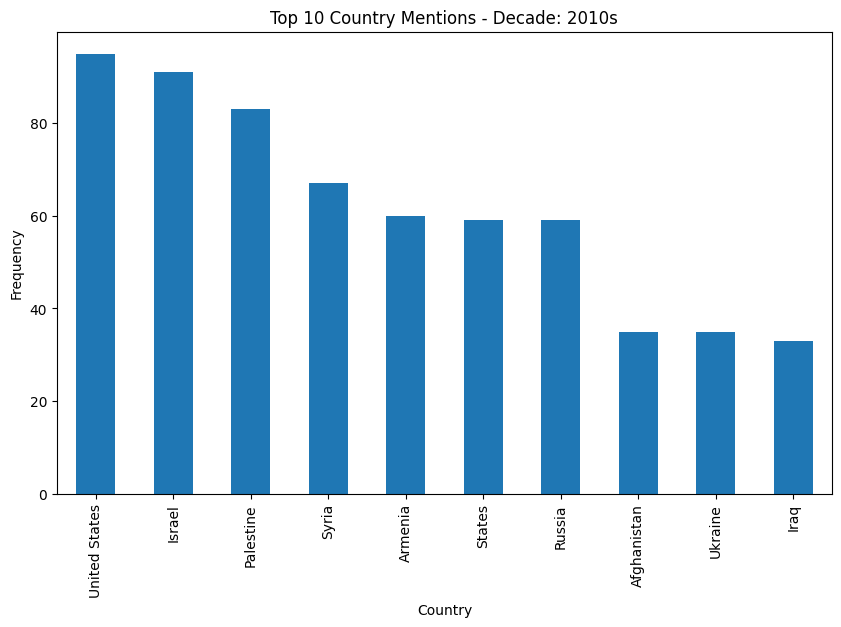

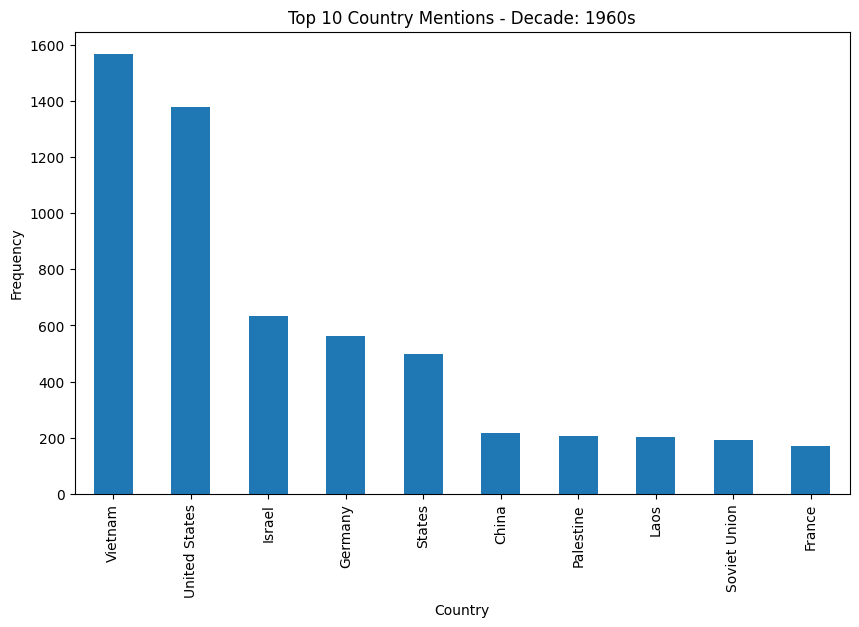

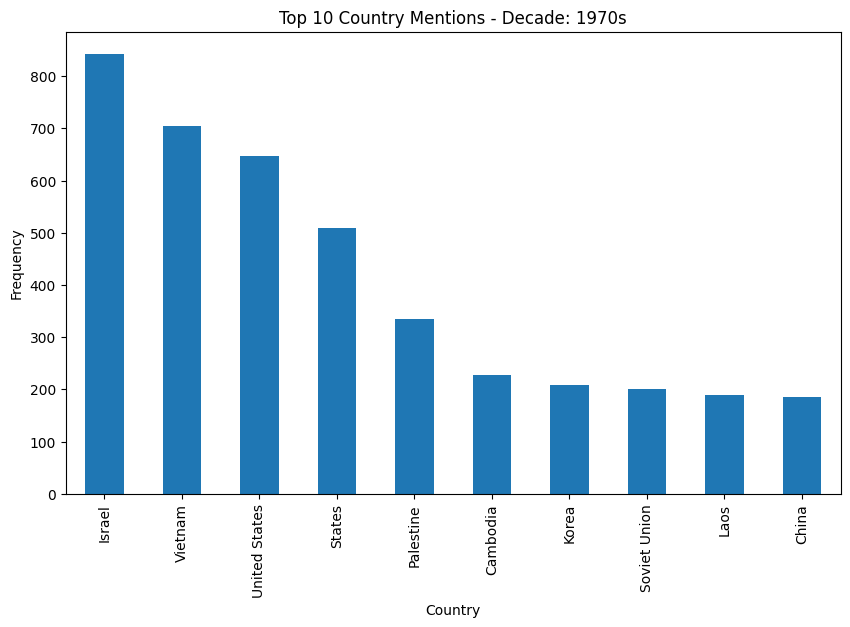

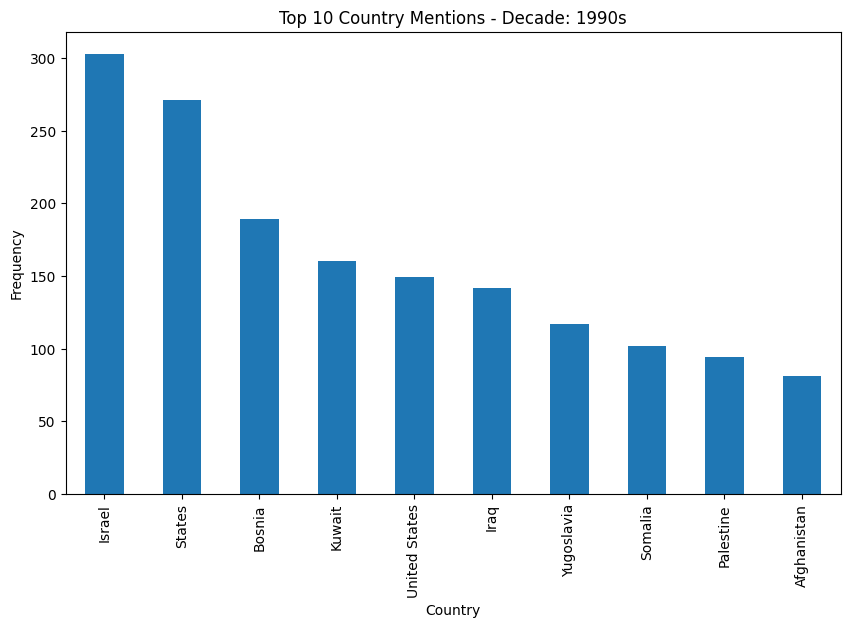

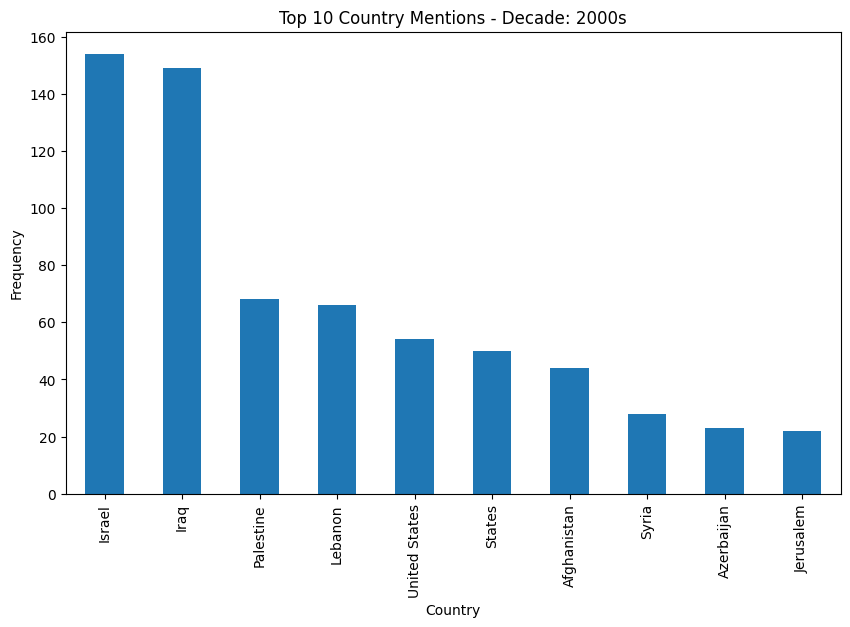

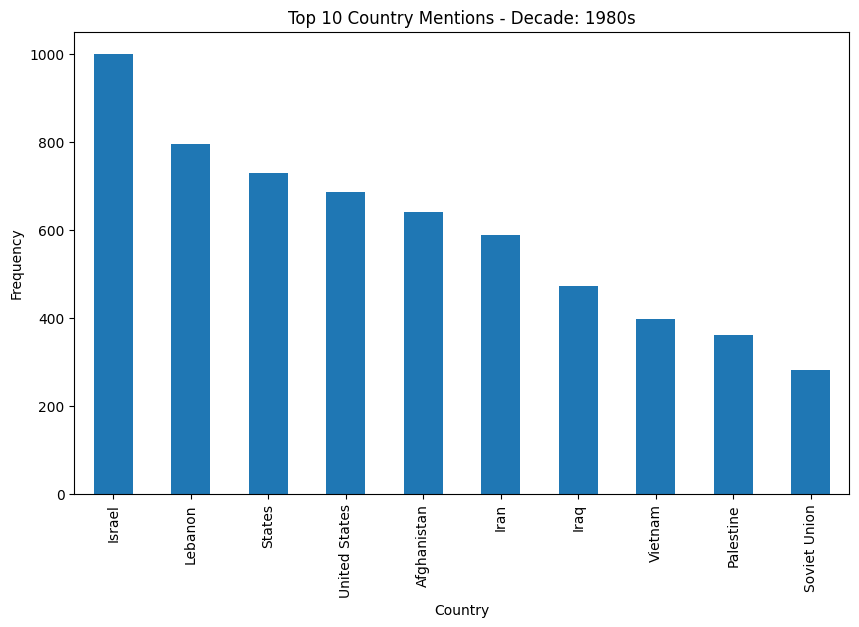

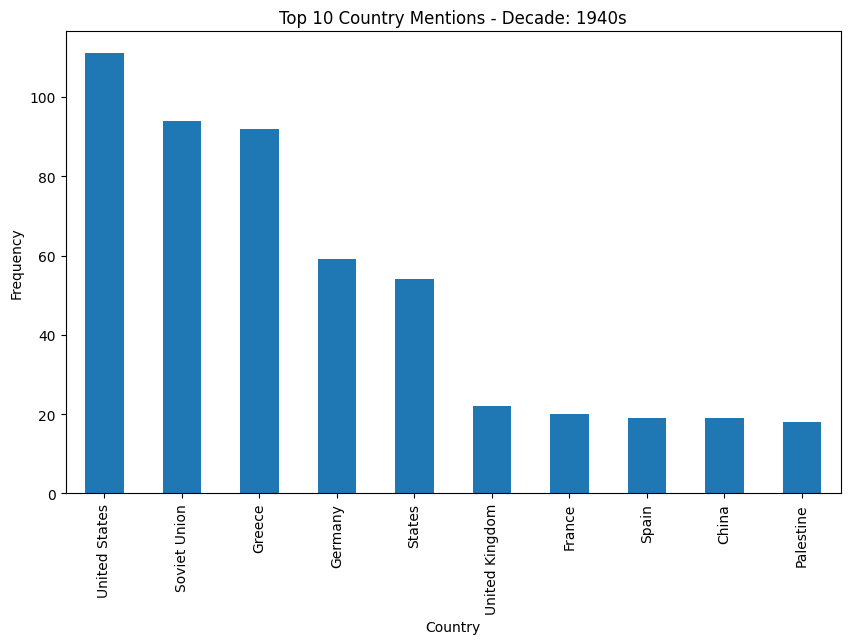

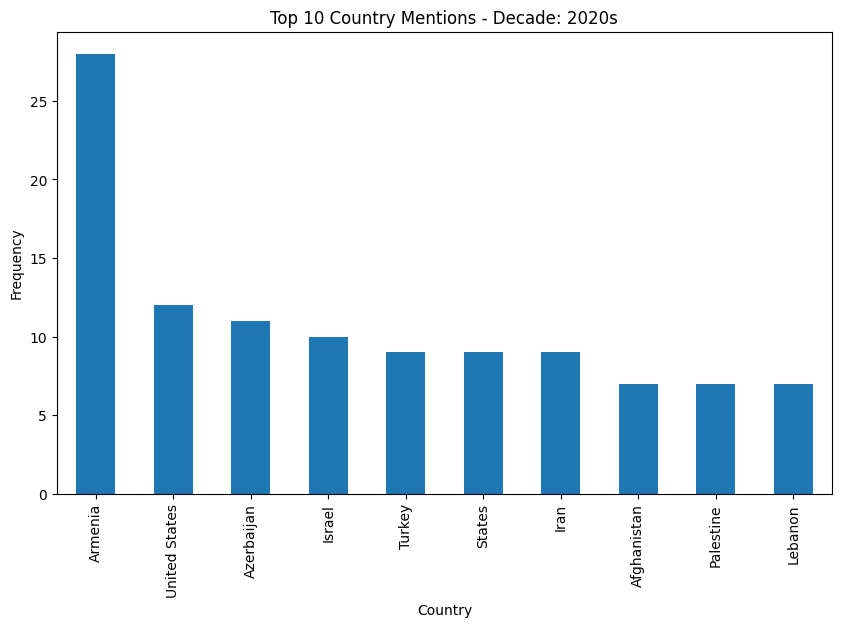

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of unique decades
decades = war_df['decade'].unique()

# Iterate over each decade and create a plot
for decade in decades:
    # Filter the data for the current decade
    data_decade = war_df[war_df['decade'] == decade]

    # Calculate the frequency of country mentions for the current decade
    country_mentions_counts = data_decade['country_mentions'].explode().value_counts()

    # Select the top ten countries by frequency
    top_countries = country_mentions_counts.head(10)

    # Plot the data
    plt.figure(figsize=(10, 6))
    top_countries.plot(kind='bar')
    plt.xlabel('Country')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Country Mentions - Decade: {decade}')
    plt.show()
